In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import csv

In [2]:
def csv_to_dict(filename):
    with open(filename, 'r') as file:
        reader = csv.DictReader(file)
        data = {header: [] for header in reader.fieldnames}
        for row in reader:
            for header in reader.fieldnames:
                data[header].append(float(row[header]))
        data = {key: np.array(value) for key, value in data.items()}
    return data

fulltext = {'MI': 'mutual information',
            'mmse': 'gen. error',
            'q2': r'$q_2$',
            'qw': r'$q_W$'}

In [8]:
gamma = 0.5
Delta = 0.1
activation = 'ReLU'
vlaw = 'ones'

data_uni = csv_to_dict(fr'{activation}_Delta_{Delta}_gamma_{gamma}_v_{vlaw}_uni.csv')
data_spe = csv_to_dict(fr'{activation}_Delta_{Delta}_gamma_{gamma}_v_{vlaw}_spe.csv')

diff = lambda x: np.interp(x, data_uni['alpha'], data_uni['MI']) - np.interp(x, data_spe['alpha'], data_spe['MI'])
alpha_c = fsolve(diff, 3)

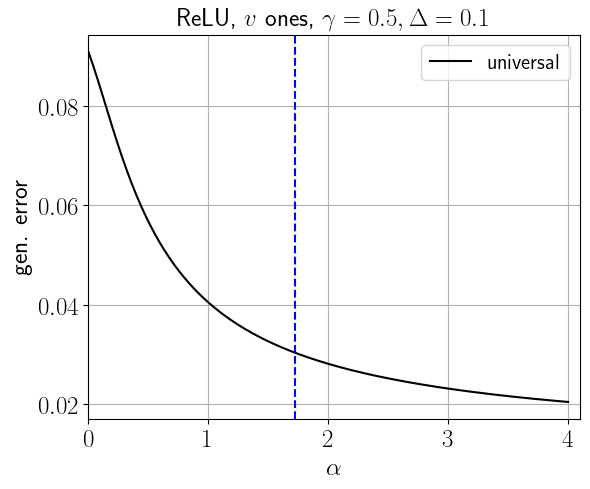

In [10]:
width, height = 6, 5
big, small = int(width*3), int(width*2.5)
fig, ax = plt.subplots(figsize=(width, height), tight_layout=True)

quantity = 'mmse'
plt.plot(data_uni['alpha'], data_uni[quantity], label='universal', color='black')
# plt.plot(data_spe['alpha'], data_spe[quantity], label='specialization', color='red')

plt.axvline(alpha_c, color='b', linestyle='--')

ax.tick_params(axis='both', labelsize=big)
plt.xlabel(r'$\alpha$', fontsize=big)
plt.ylabel(fulltext[quantity], fontsize=big)
plt.legend(fontsize=small)
plt.xlim(0,4.1)
# plt.ylim(0, 0.04)
plt.grid(True)
plt.title(fr'{activation}, $v$ {vlaw}, $\gamma={gamma}, \Delta={Delta}$', fontsize=big)
# plt.savefig(fr'{quantity}_{activation}_gamma_{gamma}_Delta_{Delta}.jpg', dpi=300)
plt.show()

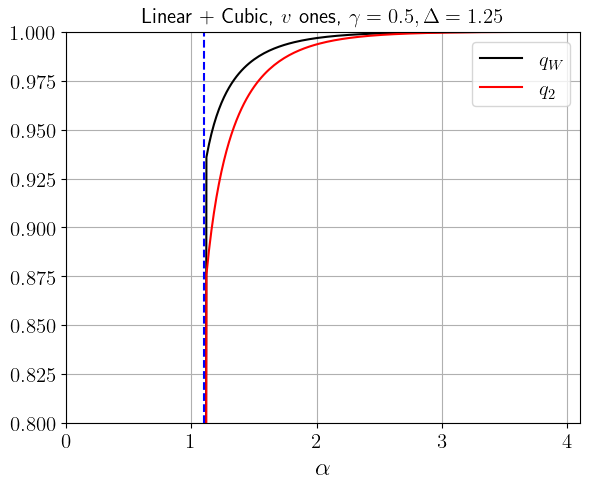

In [35]:
width, height = 6, 5
big, small = int(width*3), int(width*2.5)
fig, ax = plt.subplots(figsize=(width, height), tight_layout=True)

plt.plot(data_spe['alpha'], data_spe['qw'], label='$q_W$', color='black')
plt.plot(data_spe['alpha'], data_spe['q2'], label='$q_2$', color='red')


ax.tick_params(axis='both', labelsize=small)
plt.xlabel(r'$\alpha$', fontsize=big)
plt.legend(fontsize=small)
plt.xlim(0,4.1)
plt.ylim(0.8, 1)
plt.axvline(alpha_c, color='b', linestyle='--')
plt.grid(True)
plt.title(fr'{activation}, $v$ {vlaw}, $\gamma={gamma}, \Delta={Delta}$', fontsize=small)
plt.show()